<a href="https://colab.research.google.com/github/JanePer/AI---PORTFOLIO/blob/main/Task12_(Lite)_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%B3%D0%B5%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [ ]:
train = np.array([11, 18, 6, 15, 9, 3, 2, 21])
size = np.array([5, 6, 9, 5, 4, 3, 3, 5, 8, 2, 6, 3, 2, 1, 2, 20, 1]) 
print(train.sum())
print(size.sum())
print(train.shape)
print(size.shape)

85
85
(8,)
(17,)


In [ ]:
'''
popul - our population
val - current values
nsurv - qty of survived
reverse - required operation of finding results: max or min
'''

def getSurvPopul (popul, val, nsurv, reverse):
  newpopul=[]
  sval=sorted(val, reverse=reverse)
  for i in range(nsurv):
    index=val.index(sval[i])
    newpopul.append(popul[index])
  return newpopul, sval

'''
curr_popul - current population
nsurv - qty of survived
'''

def getParents(curr_popul, nsurv):
  indexp1=random.randint(0, nsurv-1)
  indexp2=random.randint(0, nsurv-1)
  botp1=curr_popul[indexp1]
  botp2=curr_popul[indexp2]
  return botp1, botp2

  '''
  botp1 - first bot-parent
  botp2 - second bot-parent
  j - number of bot's value
  '''

def crossPointFrom2Parents(botp1, botp2, j):
  pindex = random.random() #random number from 0 till 1
  # if pindex < 0.5 get values from botp1, else from botp2
  if pindex < 0.5:
    x=botp1[j]
  else:
    x=botp2[j]
  return x

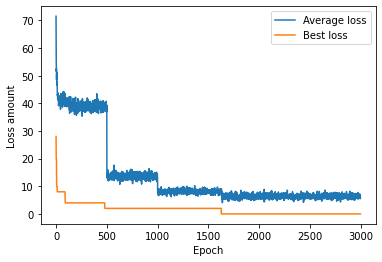

In [ ]:
n=200 # population size
nsurv=20
nnew=n-nsurv #qty of children
epochs=3000
mut=0.4
l=size.shape[0]
trains = train.shape[0]
popul =[] #population array with [n,l] size
plotmeanval = []
plotminval = []

for i in range(n):
  popul.append([])
  for j in range(l):
    popul[i].append(random.randint(0,trains-1))

for p in range(epochs):
  if (p>=500):
    mut = 0.1
  if (p>=1000):
    mut = 0.05
  
  val = []
  for i in range(n):
    bot=popul[i]
    trainfill = np.array([0, 0, 0, 0, 0, 0, 0, 0])
    for j in range(l):
      trainfill[bot[j]] += size[j]
    f=0
    for t in range(trains):
      f += abs(train[t] - trainfill[t]) 
    val.append(f)

  newpopul, sval = getSurvPopul (popul, val, nsurv, 0) #create new population with the best 20 bots-parents
  #print(p, " ", [round(s,8) for s in val[:5]]) #print first 5 f() values
  plotmeanval.append(sum(val) / len(val)) 
  plotminval.append(sval[0])

  for i in range(nnew):
    botp1, botp2 = getParents(newpopul, nsurv)
    newbot=[]
    for j in range(l):
      x=crossPointFrom2Parents(botp1, botp2, j)
      if (random.random() < mut):
        x = random.randint(0, trains - 1)       
      newbot.append(x)
    newpopul.append(newbot)  #add newbot-child to the new population
  popul=newpopul

plt.plot(plotmeanval, 
         label='Average loss')
plt.plot(plotminval, 
         label='Best loss')
plt.xlabel('Epoch')
plt.ylabel('Loss amount')
plt.legend()
plt.show()

In [ ]:
bot = popul[0]
print ('The best bot:', bot) 

trainfill = np.zeros(trains, dtype = 'int32')
for j in range(l): 
    trainfill[bot[j]] += size[j] 

print ('Real sizes  :', size) 
print ('Capacity distribution via bot:', trainfill) 
print ('Real trains capacity:', train) 

The best bot: [4, 2, 3, 1, 4, 5, 1, 3, 0, 6, 1, 0, 1, 7, 1, 7, 3]
Real sizes  : [ 5  6  9  5  4  3  3  5  8  2  6  3  2  1  2 20  1]
Capacity distribution via bot: [11 18  6 15  9  3  2 21]
Real trains capacity: [11 18  6 15  9  3  2 21]


#1 Part

In [ ]:
train = np.array([1, 12, 72, 4, 55, 1])
size = np.array([1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8]) 
print(train.sum())
print(size.sum())
print(train.shape)
print(size.shape)

145
145
(6,)
(18,)


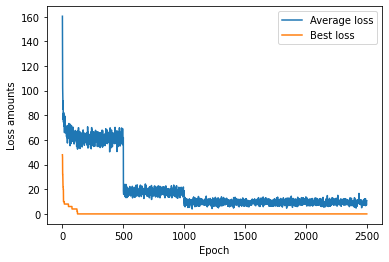

In [ ]:
n=100 # population size
nsurv=20
nnew=n-nsurv #qty of children
epochs=2500
mut=0.4
l=size.shape[0]
trains = train.shape[0]
popul =[] #population array with [n,l] size
plotmeanval = []
plotminval = []

for i in range(n):
  popul.append([])
  for j in range(l):
    popul[i].append(random.randint(0,trains-1))

for p in range(epochs):
  if (p>=500):
    mut = 0.1
  if (p>=1000):
    mut = 0.05
  
  val = []
  for i in range(n):
    bot=popul[i]
    trainfill = np.array([0, 0, 0, 0, 0, 0])
    for j in range(l):
      trainfill[bot[j]] += size[j]
    f=0
    for t in range(trains):
      f += abs(train[t] - trainfill[t]) 
    val.append(f)

  newpopul, sval = getSurvPopul (popul, val, nsurv, 0) #create new population with the best 20 bots-parents
  #print(p, " ", [round(s,8) for s in val[:5]]) #print first 5 f() values
  plotmeanval.append(sum(val) / len(val)) 
  plotminval.append(sval[0])

  for i in range(nnew):
    botp1, botp2 = getParents(newpopul, nsurv)
    newbot=[]
    for j in range(l):
      x=crossPointFrom2Parents(botp1, botp2, j)
      if (random.random() < mut):
        x = random.randint(0, trains - 1)       
      newbot.append(x)
    newpopul.append(newbot)  #add newbot-child to the new population
  popul=newpopul

plt.plot(plotmeanval, 
         label='Average loss')
plt.plot(plotminval, 
         label='Best loss')
plt.xlabel('Epoch')
plt.ylabel('Loss amount')
plt.legend()
plt.show()

In [ ]:
bot = popul[0]
print ('The best bot:', bot) 

trainfill = np.zeros(trains, dtype = 'int32')
for j in range(l): 
    trainfill[bot[j]] += size[j] 

print ('Real sizes  :', size) 
print ('Capacity distribution via bot:', trainfill) 
print ('Real trains capacity:', train)

The best bot: [0, 1, 2, 5, 3, 1, 2, 2, 1, 2, 2, 4, 4, 4, 4, 1, 2, 4]
Real sizes  : [ 1  1  1  1  4  3  3  3  1 27 31  7  7 11 22  7  7  8]
Capacity distribution via bot: [ 1 12 72  4 55  1]
Real trains capacity: [ 1 12 72  4 55  1]


#2 Part

In [ ]:
train = np.array([10, 10, 10, 12, 12, 12])
size = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6]) 
print(train.sum())
print(size.sum())
print(train.shape)
print(size.shape)

66
54
(6,)
(18,)


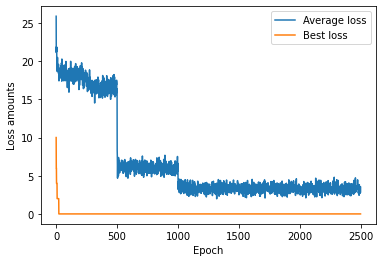

In [ ]:
n=100 # population size
nsurv=20
nnew=n-nsurv #qty of children
epochs=2500
mut=0.4
l=size.shape[0]
trains = train.shape[0]
popul =[] #population array with [n,l] size
plotmeanval = []
plotminval = []

for i in range(n):
  popul.append([])
  for j in range(l):
    popul[i].append(random.randint(0,trains-1))

for p in range(epochs):
  if (p>=500):
    mut = 0.1
  if (p>=1000):
    mut = 0.05
  
  val = []
  for i in range(n):
    bot=popul[i]
    trainfill = np.array([0, 0, 0, 0, 0, 0])
    for j in range(l):
      trainfill[bot[j]] += size[j]
    f=0
    for t in range(trains):
      f+= abs(size.sum()/train.shape[0] - trainfill[t])
    val.append(f)

  newpopul, sval = getSurvPopul (popul, val, nsurv, 0) #create new population with the best 20 bots-parents
  #print(p, " ", [round(s,8) for s in val[:5]]) #print first 5 f() values
  plotmeanval.append(sum(val) / len(val)) 
  plotminval.append(sval[0])

  for i in range(nnew):
    botp1, botp2 = getParents(newpopul, nsurv)
    newbot=[]
    for j in range(l):
      x=crossPointFrom2Parents(botp1, botp2, j)
      if (random.random() < mut):
        x = random.randint(0, trains - 1)       
      newbot.append(x)
    newpopul.append(newbot)  #add newbot-child to the new population
  popul=newpopul

plt.plot(plotmeanval, 
         label='Average loss')
plt.plot(plotminval, 
         label='Best loss')
plt.xlabel('Epoch')
plt.ylabel('Loss amounts')
plt.legend()
plt.show()

In [ ]:
bot = popul[0]
print ('The best bot:', bot) 

trainfill = np.zeros(trains, dtype = 'int32')
for j in range(l): 
    trainfill[bot[j]] += size[j] 

print ('Real sizes  :', size) 
print ('Capacity distribution via bot:', trainfill) 
print ('Real trains capacity:', train)

The best bot: [2, 1, 4, 1, 0, 0, 4, 3, 1, 5, 3, 2, 1, 3, 2, 0, 4, 5]
Real sizes  : [1 1 1 1 2 2 2 2 3 3 3 3 4 4 5 5 6 6]
Capacity distribution via bot: [9 9 9 9 9 9]
Real trains capacity: [10 10 10 12 12 12]
